In [1]:
import os
import pandas as pd
import re
import constants
import os
import requests
import pandas as pd
import multiprocessing
import time
from time import time as timer
from tqdm import tqdm
import numpy as np
from pathlib import Path
from functools import partial
import requests
import urllib
from PIL import Image


In [2]:
# DATASET_FOLDER = '../dataset/'
# train = pd.read_csv(os.path.join(DATASET_FOLDER, '/content/test.csv'))
# test = pd.read_csv(os.path.join(DATASET_FOLDER, '/content/test_sample.csv'))
# sample_test = pd.read_csv(os.path.join(DATASET_FOLDER, 'sample_test.csv'))
# sample_test_out = pd.read_csv(os.path.join(DATASET_FOLDER, 'sample_test_out.csv'))

In [3]:
# !pip install utils

In [4]:
from utils import download_images


In [5]:
# import os

# # Create directory for images
# image_folder = '/content/images'
# if not os.path.exists(image_folder):
#     os.makedirs(image_folder)

# # Download images and save them in the new folder
# download_images(test['image_link'], image_folder)


In [6]:
# !zip -r /content/images.zip /content/images
# from google.colab import files
# files.download('/content/images.zip')


In [7]:
# import os

# # Create directory for images
# image_folder = '/content/train_images'
# if not os.path.exists(image_folder):
#     os.makedirs(image_folder)

# # Download images and save them in the new folder
# download_images(train['image_link'], image_folder)


In [8]:
import pandas as pd

# Load the CSV file
input_file_path = '/content/test.csv'
df = pd.read_csv(input_file_path)

# Extract rows from 25001 to 50000 (note: indexing starts at 0, so row 25001 is index 25000)
df_subset = df.iloc[:20000]

# Save the subset of rows to a new CSV file
output_file_path = '/content/test_0_20.csv'
df_subset.to_csv(output_file_path, index=False)

print(f"Rows 0 to 20000 saved to {output_file_path}")


Rows 0 to 20000 saved to /content/test_0_20.csv


In [10]:
input_file_path = "/content/test_0_20.csv"
df1 = pd.read_csv(input_file_path)
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        20000 non-null  int64 
 1   image_link   20000 non-null  object
 2   group_id     20000 non-null  int64 
 3   entity_name  20000 non-null  object
dtypes: int64(2), object(2)
memory usage: 625.1+ KB


In [11]:
df1.head()

,index,image_link,group_id,entity_name
0,0,https://m.media-amazon.com/images/I/110EibNycl...,156839,height
1,1,https://m.media-amazon.com/images/I/11TU2clswz...,792578,width
2,2,https://m.media-amazon.com/images/I/11TU2clswz...,792578,height
3,3,https://m.media-amazon.com/images/I/11TU2clswz...,792578,depth
4,4,https://m.media-amazon.com/images/I/11gHj8dhhr...,792578,depth


In [12]:
import os

# Define the folder path for images in Kaggle working directory
image_folder = 'content/test_images'

# Check if the folder exists, if not, create it
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

# Assuming you have a function `download_images` that takes image links from a DataFrame and saves them
# You can now download the images and save them in the new folder
download_images(df1['image_link'], image_folder)

100%|██████████| 20000/20000 [01:41<00:00, 196.45it/s]


In [13]:
!pip install paddlepaddle-gpu
!pip install paddleocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 64.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=3566081f88206fe0907091bfb9e7d0813478c9f2a245f4eda60e4b4432d830a0
  Stored in d

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:00<00:00, 5.79MiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:00<00:00, 12.2MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:00<00:00, 3.92MiB/s]


[2024/09/14 20:10:35] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_ch

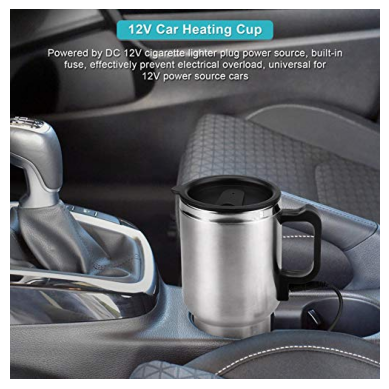

Recognized Text:  12VCar Heating Cup Powered by DC 12V cigarettelighter piug power source,built-in fuse,effectively prevent electrical overload,universal for 12V power source cars


In [14]:
import requests
from PIL import Image as PILImage
import numpy as np
from paddleocr import PaddleOCR
import matplotlib.pyplot as plt

"""
Paddle OCR
"""
def ocr_with_paddle(img_url):
    finaltext = ''
    ocr = PaddleOCR(lang='en', use_angle_cls=True)

    # Download the image from the URL
    response = requests.get(img_url, stream=True)
    img = PILImage.open(response.raw).convert("RGB")

    # Convert PIL Image to numpy array (OpenCV format)
    img_np = np.array(img)

    # Perform OCR
    result = ocr.ocr(img_np)

    # Extract text from the result
    for i in range(len(result[0])):
        text = result[0][i][1][0]
        finaltext += ' ' + text

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

    return finaltext

# Example usage
img_url = 'https://m.media-amazon.com/images/I/514pScQdlCL.jpg'
recognized_text = ocr_with_paddle(img_url)
print("Recognized Text:", recognized_text)


In [16]:
import os

# Specify the folder containing the images
image_folder = '/content/content/test_images'

# Count the number of image files in the folder
num_images = len([f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))])

print(f'Total number of images: {num_images}')


Total number of images: 13722


In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image as PILImage
from paddleocr import PaddleOCR
import matplotlib.pyplot as plt

# Initialize PaddleOCR with GPU support
ocr = PaddleOCR(lang='en', use_angle_cls=True, use_gpu=True)  # Ensure use_gpu=True

def ocr_with_paddle(image_path):
    """
    Apply OCR on an image located at image_path.
    """
    finaltext = ''

    try:
        # Open the image file
        img = PILImage.open(image_path).convert("RGB")

        # Convert PIL Image to numpy array (OpenCV format)
        img_np = np.array(img)

        # Perform OCR
        result = ocr.ocr(img_np)

        if result:
            # Extract text from the result
            for line in result[0]:
                text = line[1][0]
                finaltext += ' ' + text
        else:
            print(f"Warning: No result returned for image {image_path}")

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

    return finaltext

# Load the CSV file
csv_file = '/content/test_0_20.csv'
df = pd.read_csv(csv_file)

# Define the output CSV file
output_csv_file = '/content/test_0_20_with_output_text.csv'

# If the output CSV already exists, load it to avoid re-processing
if os.path.exists(output_csv_file):
    df_output = pd.read_csv(output_csv_file)
else:
    # Create a new DataFrame with an additional 'output_text' column
    df_output = df.copy()
    df_output['output_text'] = ''  # Initialize the new column with empty strings

# Process each image
for index, row in df.iterrows():
    if pd.notna(df_output.loc[index, 'output_text']) and df_output.loc[index, 'output_text'] != '':
        # Skip already processed rows
        continue

    img_filename = row['image_link'].split('/')[-1]  # Extract the filename from the URL
    img_path = os.path.join('/content/content/test_images', img_filename)  # Construct the path

    if os.path.exists(img_path):
        # Apply OCR and get text
        text = ocr_with_paddle(img_path)
        df_output.at[index, 'output_text'] = text  # Update the row with extracted text
    else:
        df_output.at[index, 'output_text'] = ''  # If image not found, append empty string

    # Save the DataFrame after processing each image
    df_output.to_csv(output_csv_file, index=False)

    # Print the number of processed rows
    print(f"Processed {index + 1}/{len(df)} images")

print(f"Final CSV file saved to {output_csv_file}")


[2024/09/14 20:12:32] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_ch

In [ ]:
# import pandas as pd

# # Load the CSV file
# train_sample = pd.read_csv('/content/train_sample.csv')

# # Display the first few rows to get an overview
# train_sample.head()


In [ ]:
# train_sample.info()


In [ ]:
# Assuming you have already loaded the CSV into a pandas DataFrame
# unique_group_ids = train_sample['group_id'].nunique()

# print(f'Total number of unique group_id: {unique_group_ids}')


In [ ]:
# import os
# import pandas as pd
# import numpy as np
# from PIL import Image as PILImage
# from paddleocr import PaddleOCR
# import matplotlib.pyplot as plt

# # Initialize PaddleOCR with GPU support
# ocr = PaddleOCR(lang='en', use_angle_cls=True, use_gpu=True)  # Ensure use_gpu=True

# def ocr_with_paddle(image_path):
#     """
#     Apply OCR on an image located at image_path.
#     """
#     finaltext = ''

#     try:
#         # Open the image file
#         img = PILImage.open(image_path).convert("RGB")

#         # Convert PIL Image to numpy array (OpenCV format)
#         img_np = np.array(img)

#         # Perform OCR
#         result = ocr.ocr(img_np)

#         if result:
#             # Extract text from the result
#             for line in result[0]:
#                 text = line[1][0]
#                 finaltext += ' ' + text
#         else:
#             print(f"Warning: No result returned for image {image_path}")

#     except Exception as e:
#         print(f"Error processing image {image_path}: {e}")

#     return finaltext

# # Load the CSV file
# csv_file = '/content/train_sample_subset.csv'
# df = pd.read_csv(csv_file)

# # Create a list to store the extracted text
# image_texts = []

# # Process each image
# for index, row in df.iterrows():
#     img_filename = row['image_link'].split('/')[-1]  # Extract the filename from the URL
#     img_path = os.path.join('/content/train_images', img_filename)  # Construct the path
#     if os.path.exists(img_path):
#         # Apply OCR and get text
#         text = ocr_with_paddle(img_path)
#         image_texts.append(text)
#     else:
#         image_texts.append('')  # If image not found, append empty string

# # Add the extracted text to the DataFrame
# df['image_text'] = image_texts

# # Save the updated DataFrame to a new CSV file
# output_csv_file = '/content/train_sample_with_text.csv'
# df.to_csv(output_csv_file, index=False)

# print(f"Updated CSV file saved to {output_csv_file}")


In [ ]:
from google.colab import files

# Path to the output CSV file
output_csv_file = '/content/train_sample_with_text.csv'

# Download the CSV file to your local machine
files.download(output_csv_file)
